<a href="https://colab.research.google.com/github/Sandhiya927/Phase2project/blob/main/phase2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('creditcard.csv')  # Replace with your dataset filename

Saving creditcard.csv to creditcard.csv


In [ ]:
# Check for null values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Feature scaling
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


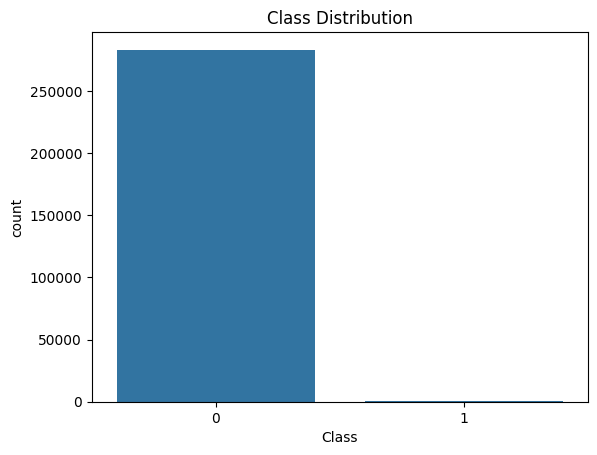

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [ ]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56651
           1       0.97      0.92      0.95     56651

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

Confusion Matrix:
 [[55173  1478]
 [ 4561 52090]]
ROC-AUC: 0.9890453889278132

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
 [[56641    10]
 [    2 56649]]
ROC-AUC: 0.9999820092057733

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     56651
  

In [ ]:
joblib.dump(rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']